In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import warnings
import opendatasets as od
import json
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval

# Download the dataset

In [2]:
os.chdir('../Datasets/')
dataset = 'https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset'
od.download(dataset)
dataset = 'https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata'
od.download(dataset)
os.chdir('../py_notebooks/')

Skipping, found downloaded files in "./the-movies-dataset" (use force=True to force download)
Skipping, found downloaded files in "./tmdb-movie-metadata" (use force=True to force download)


# Loading the data set 

In [3]:
df = pd.read_csv("/home/abhinav/Datasets/the-movies-dataset/credits.csv")
# df = df.sample(frac = 1).reset_index()
# df.drop('index', axis=1, inplace=True)

In [4]:
df.shape

(45476, 3)

# Let's Explore the data set 

In [5]:
df1=pd.read_csv('../Datasets/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../Datasets/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [6]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [7]:
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
C= df2['vote_average'].mean()
C

6.092171559442011

In [10]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [11]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [12]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [13]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [14]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

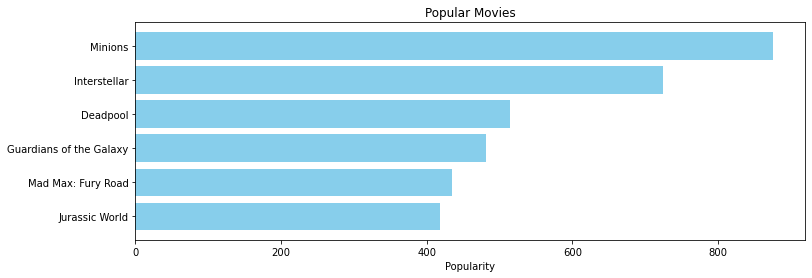

In [15]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# new data

In [96]:
d1 = pd.read_csv("../Datasets/the-movies-dataset/credits.csv")
d2 = pd.read_csv("../Datasets/the-movies-dataset/keywords.csv")
d3 = pd.read_csv("../Datasets/the-movies-dataset/links.csv")

# d4 = pd.read_csv("../Datasets/the-movies-dataset/links_small.csv")

d5 = pd.read_csv("../Datasets/the-movies-dataset/movies_metadata.csv")
d6 = pd.read_csv("../Datasets/the-movies-dataset/ratings.csv")

# d7 = pd.read_csv("../Datasets/the-movies-dataset/ratings_small.csv")

/tmp/ipykernel_905060/280190162.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  d5 = pd.read_csv("../Datasets/the-movies-dataset/movies_metadata.csv")


d1 + d2 id

d3 + d5 imdb
d35 + d6 movieID

In [97]:
d1["id"] = d1["id"].astype(str)
# d1["cast"] = d1["cast"].astype(str)
d2["id"] = d2["id"].astype(str)
d6["userId"] = d6["userId"].astype(str)
d6["movieId"] = d6["movieId"].astype(str)

In [98]:
d52 = pd.merge(d5, d2, on='id', how='inner')
d521 = pd.merge(d52, d1, on='id', how='inner').rename(columns={"id":"movieId"})

In [99]:
# d5216 = pd.merge(d6, d521,  on='movieId', how='left')
# d5216["genres"] = d5216["genres"].astype(str)

In [100]:
len(d521)

46628

In [101]:
d521.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  46628 non-null  object 
 1   belongs_to_collection  4574 non-null   object 
 2   budget                 46628 non-null  object 
 3   genres                 46628 non-null  object 
 4   homepage               8009 non-null   object 
 5   movieId                46628 non-null  object 
 6   imdb_id                46611 non-null  object 
 7   original_language      46617 non-null  object 
 8   original_title         46628 non-null  object 
 9   overview               45633 non-null  object 
 10  popularity             46624 non-null  object 
 11  poster_path            46229 non-null  object 
 12  production_companies   46624 non-null  object 
 13  production_countries   46624 non-null  object 
 14  release_date           46540 non-null  object 
 15  re

In [102]:
# d5216.drop('timestamp', axis=1, inplace=True)
d521.drop('adult', axis=1, inplace=True)
d521.drop('imdb_id', axis=1, inplace=True)
d521.drop('belongs_to_collection', axis=1, inplace=True)
d521.drop('video', axis=1, inplace=True)
d521.drop('poster_path', axis=1, inplace=True)
d521.drop('homepage', axis=1, inplace=True)
d521.drop('tagline', axis=1, inplace=True) #since more than half of the movies have no tagline 

In [103]:
d521

,budget,genres,movieId,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,keywords,cast,crew
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0,"[{'id': 10703, 'name': 'tragic love'}]","[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de..."
46624,0,"[{'id': 18, 'name': 'Drama'}]",111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,...","[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
46625,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'E

In [104]:
d521.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                46628 non-null  object 
 1   genres                46628 non-null  object 
 2   movieId               46628 non-null  object 
 3   original_language     46617 non-null  object 
 4   original_title        46628 non-null  object 
 5   overview              45633 non-null  object 
 6   popularity            46624 non-null  object 
 7   production_companies  46624 non-null  object 
 8   production_countries  46624 non-null  object 
 9   release_date          46540 non-null  object 
 10  revenue               46624 non-null  float64
 11  runtime               46360 non-null  float64
 12  spoken_languages      46624 non-null  object 
 13  status                46542 non-null  object 
 14  title                 46624 non-null  object 
 15  vote_average       

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [106]:
# d5216["movieId"] = d5216["movieId"].astype(int)

In [107]:
# d5216["userId"] = d5216["userId"].astype(int)

In [108]:
features = d521.columns
for i in features:
    print(i,d521[i].isna().sum())

budget 0
genres 0
movieId 0
original_language 11
original_title 0
overview 995
popularity 4
production_companies 4
production_countries 4
release_date 88
revenue 4
runtime 268
spoken_languages 4
status 86
title 4
vote_average 4
vote_count 4
keywords 0
cast 0
crew 0


In [109]:
d521['status'].value_counts()

Released           46164
Rumored              240
Post Production      100
In Production         21
Planned               15
Canceled               2
Name: status, dtype: int64

delete popularity_missing, tagline_column, title_votecount_voteavg_missing, make_0 for runtime nulls, convert dates to release year and delete nulls, make revenue 0 for nulls, delete null original language, delete null cancelled planned rummored

In [154]:
features = d521.columns
for i in features:
    print(i,d521[i].isna().sum())

budget 0
genres 0
movieId 0
original_language 0
original_title 0
overview 950
popularity 0
production_companies 0
production_countries 0
revenue 0
runtime 0
spoken_languages 0
status 0
title 0
vote_average 0
vote_count 0
keywords 0
cast 0
crew 0
release_year 0


#### Remove all majority null rows

In [115]:
d521 = d521[d521.popularity.notnull()] #removed all null rows

#### Delete all records with status = null cancelled planned rummored

In [118]:
d521 = d521[d521.status.notnull()]

In [121]:
d521.drop(d521[d521['status'] == 'Canceled'].index, inplace = True)

In [122]:
d521.drop(d521[d521['status'] == 'Planned'].index, inplace = True)

In [123]:
d521.drop(d521[d521['status'] == 'Rumored'].index, inplace = True)

#### Delete all records with release date = null And convert release date to release year

In [126]:
d521 = d521[d521.release_date.notnull()]

In [138]:
rel_year = []
c = 0
for ind in d521.index:
    rel_year.append(int(d521["release_date"][ind][:4]))
d521["release_year"] = rel_year

In [141]:
d521.drop("release_date", axis=1, inplace=True)

#### Delete all records with original_language = null

In [144]:
d521 = d521[d521.original_language.notnull()]

#### Make all null runtimes = 0

In [153]:
d521["runtime"].fillna(value = 0, inplace = True)

#### Make null cast overview as empty string

In [156]:
d521["cast"] = d521["cast"].astype(str)
d521["overview"] = d521["overview"].astype(str)

#### Handled all null cases

In [159]:
features = d521.columns
for i in features:
    print(i,d521[i].isna().sum())

budget 0
genres 0
movieId 0
original_language 0
original_title 0
overview 0
popularity 0
production_companies 0
production_countries 0
revenue 0
runtime 0
spoken_languages 0
status 0
title 0
vote_average 0
vote_count 0
keywords 0
cast 0
crew 0
release_year 0


In [160]:
len(d521)

46195

## Preprocessing

In [306]:
df2 = d521.copy()

In [307]:
genres = {}
done = []
index = 0
add_gen = []
for i in df2.index:
    curr = []
    res = df2["genres"][i]
    res = res.replace("\'", "\"")
    res = str(res)
    if(res == "nan"):
        res ="[]"
    res = json.loads(res)
#     res = df2.loc[i, "genres"]
#     print(type(df2.loc[i, "genres"]))
    for j in range(len(res)):
        if(res[j]["name"] not in done):
            done.append(res[j]['name'])
            genres[res[j]["name"]] = index
            index+=1
        curr.append(genres[res[j]["name"]])
    add_gen.append(curr)

In [308]:
genres

{'Animation': 0,
 'Comedy': 1,
 'Family': 2,
 'Adventure': 3,
 'Fantasy': 4,
 'Romance': 5,
 'Drama': 6,
 'Action': 7,
 'Crime': 8,
 'Thriller': 9,
 'Horror': 10,
 'History': 11,
 'Science Fiction': 12,
 'Mystery': 13,
 'War': 14,
 'Foreign': 15,
 'Music': 16,
 'Documentary': 17,
 'Western': 18,
 'TV Movie': 19}

In [309]:
df2.drop('genres', axis=1, inplace=True)
df2['genres'] = add_gen

In [310]:
keywords = {}
done = []
index = 0
add_gen = []
for i in df2.index:
    curr = []
    res = df2["keywords"][i]
#     print(res)
#     try:
    res = res.replace('\"', "\'")
    res = res.replace("'id'", '"id"')
    res = res.replace("'name'", '"name"')
    res = res.replace(": '", ': "')
    res = res.replace("'}", '"}')
    res = res.replace("\\", '')
    res = str(res)
    if(res == "nan"):
        res ="[]"
    res = json.loads(res)
#     except:
#         add_gen.append(curr)
#         continue
#     res = json.loads(df2.loc[i, "keywords"])
    #edit
    s = ""
    for j in range(len(res)):
        if(res[j]["name"] not in done):
            done.append(res[j]["name"])
            keywords[res[j]["name"]] = index
            index+=1
            #edit
            s = res[j]["name"]
            
#         curr.append(keywords[res[j]["name"]])
        #edit
        if(s != ""):
            curr.append(s.lower().replace(' ', ''))
    add_gen.append(curr)

In [311]:
len(keywords)

19924

In [312]:
df2.drop('keywords', axis=1, inplace=True)
df2['keywords'] = add_gen

In [313]:
production_companies = {}
done = []
index = 0
add_gen = []
for i in df2.index:
    curr = []
    res = df2["production_companies"][i]
    res = res.replace('\"', "\'")
    res = res.replace("'id'", '"id"')
    res = res.replace("'name'", '"name"')
    res = res.replace(": '", ': "')
    res = res.replace("', \"id\"", '", "id"')
    res = res.replace("\\", '')
    res = str(res)
    if(res == "nan"):
        res ="[]"
    res = json.loads(res)
    
#     res = json.loads(df2.loc[i, "production_companies"])
    for j in range(len(res)):
        if(res[j]["name"] not in done):
            done.append(res[j]["name"])
            production_companies[res[j]["name"]] = index
            index+=1
        curr.append(production_companies[res[j]["name"]])
    add_gen.append(curr)

In [314]:
df2.drop('production_companies', axis=1, inplace=True)
df2['production_companies'] = add_gen

In [315]:
production_countries = {}
done = []
index = 0
add_gen = []
for i in df2.index:
    curr = []
    res = df2["production_countries"][i]
    res = res.replace('\"', "\'")
    res = res.replace("'iso_3166_1'", '"iso_3166_1"')
    res = res.replace("'name'", '"name"')
    res = res.replace(": '", ': "')
    res = res.replace("', \"name\"", '", "name"')
    res = res.replace("'}", '"}')
    res = res.replace("\\", '')
    res = str(res)
    if(res == "nan"):
        res ="[]"
    res = json.loads(res)
#     res = json.loads(df2.loc[i, "production_countries"])
    for j in range(len(res)):
        if(res[j]["name"] not in done):
            done.append(res[j]["name"])
            production_countries[res[j]["name"]] = index
            index+=1
        curr.append(production_countries[res[j]["name"]])
    add_gen.append(curr)

In [316]:
df2.drop('production_countries', axis=1, inplace=True)
df2['production_countries'] = add_gen

In [317]:
languages = {}
done = []
index = 0
add_gen = []
for i in df2.index:
    curr = []
    res = df2['spoken_languages'][i]
    res = res.replace('\"', "\'")
    res = res.replace("'iso_639_1'", '"iso_639_1"')
    res = res.replace("'name'", '"name"')
    res = res.replace(": '", ': "')
    res = res.replace("', \"name\"", '", "name"')
    res = res.replace("'}", '"}')
    res = res.replace("\\", '')
    res = str(res)
    if(res == "nan"):
        res ="[]"
    res = json.loads(res)
#     res = json.loads(df2.loc[i, 'spoken_languages'])
    for j in range(len(res)):
        if(res[j]["iso_639_1"] not in done):
            done.append(res[j]["iso_639_1"])
#             languages[res[j]["iso_639_1"]] = index
            languages[res[j]["iso_639_1"].lower().replace(' ', '')] = index
            index+=1
        curr.append(languages[res[j]["iso_639_1"].lower().replace(' ', '')])
    add_gen.append(curr)

In [318]:
df2.drop('spoken_languages', axis=1, inplace=True)
df2['spoken_languages'] = add_gen

In [319]:
add_gen = []
for i in df2.index:
    curr = []
    res = df2["original_language"][i]
    if(res not in done):
        done.append(res)
        languages[res] = index
        index+=1
    add_gen.append(languages[res])

In [320]:
df2.drop("original_language", axis=1, inplace=True)
df2["original_language"] = add_gen

In [322]:
df2['cast'] = df2['cast'].apply(literal_eval)
character = {}
gender = {'Male': 0, 'Female': 1, 'Undefined': 2}
actorname = {}
index_char = 0
index_cast = 0
male = []
female = []
undefined = []
add_char = []
add_actors = []
for i in df2.index:
    curr_actors = []
    curr_char = []
    curr_m = 0
    curr_f = 0
    curr_u = 0
#     res = json.loads(df2.loc[i, 'cast'])
    res = df2['cast'][i]
    
    s = ""
    for j in range(len(res)):
        if(res[j]['character'] not in character.keys()):
            character[res[j]['character']] = index_char
            index_char += 1
        #edit
        s = res[j]['character']
        
#         curr_char.append(character[res[j]['character']])
        #edit
        curr_char.append(s.lower().replace(' ', ''))
        
        if(res[j]['name'] not in actorname.keys()):
            actorname[res[j]['name']] = index_cast
            index_cast += 1
        #edit
        s = res[j]['name']
        
#         curr_actors.append(actorname[res[j]['name']])
        #edit
        curr_actors.append(s.lower().replace(' ', ''))
        
        if(res[j]['gender'] == 0):
            curr_m += 1
        elif(res[j]['gender'] == 1):
            curr_f += 1
        elif(res[j]['gender'] == 2):
            curr_u += 1
    male.append(curr_m)
    female.append(curr_f)
    undefined.append(curr_u)
    add_char.append(curr_char)
    add_actors.append(curr_actors)

In [323]:
df2.drop('cast', axis=1, inplace=True)
df2["actors"] = add_actors
df2["characters"] = add_char
df2["male_count"] = male
df2["female_count"] = female
df2["undefined_gender_count"] = undefined

In [325]:
df2["crew"] = df2["crew"].apply(literal_eval)
director = []
director_name = {}
dd = 0
index_d = 0
for i in df2.index:
    res = df2["crew"][i]
    dd = 0
    for j in range(len(res)):
        if(res[j]["job"] == 'Director' and dd == 0):
            if(res[j]["name"] not in director_name.keys()):
                director_name[res[j]["name"]] = index_d
                index_d += 1
            director.append(director_name[res[j]["name"]])
            dd = 1
    if(dd == 0):
        director_name["Director Name Not Available"] = -1
        director.append(-1)

In [326]:
df2.drop('crew', axis=1, inplace=True)
df2["director"] = director

In [ ]:
# df2.drop('homepage', axis=1, inplace=True)
# df2.drop('tittle', axis=1, inplace=True)

In [ ]:
# overview,release_date,runtime,tagline

In [329]:
df2["overview"] = df2["overview"].astype(str)
df2["status"] = df2["status"].astype(str)

In [331]:
for i in df2.index:
    res = df2.loc[i, "overview"]
    if(res == 'nan'):
        df2.loc[i, "overview"] = ""
        
    res = df2.loc[i, "status"]
    if(res == 'nan'):
        df2.loc[i, "status"] = ""

In [332]:
# All NULLs Handled
features = list(df2.columns.values)
for i in features:
    bool_series = pd.notnull(df2[i])
    print(len(df2[bool_series]))

46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195
46195


In [333]:
# encoding status
status_classes = list(df2["status"].unique())
status_classes

['Released', 'Post Production', 'In Production']

In [334]:
label_encoder = LabelEncoder()

In [335]:
df2["status_en"] = label_encoder.fit_transform(df2["status"])

In [336]:
df2["status"].value_counts()

Released           46076
Post Production       99
In Production         20
Name: status, dtype: int64

In [337]:
df2["status"].value_counts()

Released           46076
Post Production       99
In Production         20
Name: status, dtype: int64

In [338]:
encode_dict = dict(df2["status_en"].value_counts())

In [339]:
encode_dict2 = df2["status"].value_counts()

In [340]:
status_list = [0]*len(encode_dict)
for i in encode_dict.keys():
    for j in encode_dict2.keys():
        if(encode_dict[i] == encode_dict2[j]):
            status_list[i] = j


In [341]:
status = {}
for i in range(len(status_list)):
    status[status_list[i]] = i

In [342]:
df2.drop('status', axis=1, inplace=True)
df2.rename(columns = {'status_en':'status'}, inplace = True)

In [343]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46195 entries, 0 to 46627
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  46195 non-null  object 
 1   movieId                 46195 non-null  object 
 2   original_title          46195 non-null  object 
 3   overview                46195 non-null  object 
 4   popularity              46195 non-null  object 
 5   revenue                 46195 non-null  float64
 6   runtime                 46195 non-null  float64
 7   title                   46195 non-null  object 
 8   vote_average            46195 non-null  float64
 9   vote_count              46195 non-null  float64
 10  release_year            46195 non-null  int64  
 11  genres                  46195 non-null  object 
 12  keywords                46195 non-null  object 
 13  production_companies    46195 non-null  object 
 14  production_countries    46195 non-null

In [344]:
#genres,keywords,languages,production_countries,production_companies,character,gender,actorname,director_name,status

In [345]:
df2.to_csv('movies46k_prepro.csv')

In [346]:
with open("movies46k_prepro_encode_info.json", "w") as fh:
    json.dump([genres,keywords,languages,production_countries,production_companies,character,gender,actorname,director_name,status],fh)

In [347]:
with open("movies46k_prepro_encode_info.json") as fh:
    data = json.load(fh)

genres = data[0]
keywords = data[1]
languages = data[2]
production_countries = data[3]
production_companies = data[4]
character = data[5]
gender = data[6]
actorname = data[7]
director_name = data[8]
status = data[9]

## EDA

### Movie Distribution per director

In [357]:
director_movie_counts = dict(df2.director.value_counts())

In [358]:
# director_name_rev = dict(zip(director_name.values(), director_name.keys()))
counts = [0] * len(director_name)

In [359]:
for i in director_movie_counts.keys():
    counts[i] = director_movie_counts[i]

/tmp/ENTER/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/tmp/ENTER/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26480 (\N{CJK UNIFIED IDEOGRAPH-6770}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/tmp/ENTER/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26862 (\N{CJK UNIFIED IDEOGRAPH-68EE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/tmp/ENTER/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33707 (\N{CJK UNIFIED IDEOGRAPH-83AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/tmp/ENTER/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29595 (\N{CJK UNIFIED IDEOGRAPH-739B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/tmp/ENTER/lib/python3.9/site-packages/IPyt

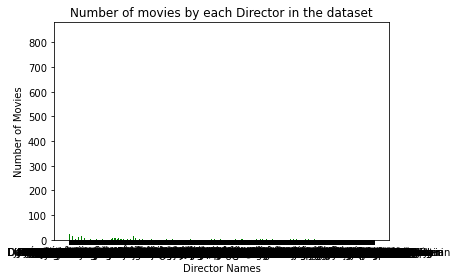

<Figure size 432x288 with 0 Axes>

In [360]:
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)
plt.xlabel("Director Names")
plt.ylabel("Number of Movies")
plt.title("Number of movies by each Director in the dataset")
plt.bar(list(director_name), counts, color ='green', width = 0.4)
plt.show()
plt.savefig("./plots/p1.jpg")

A better of plot for the above analysis ka be the following

In [361]:
counts = [0] * max(director_movie_counts.values())
label = list(range(1, max(director_movie_counts.values())+1))

In [362]:
for i in director_movie_counts.values():
    counts[i-1] += 1

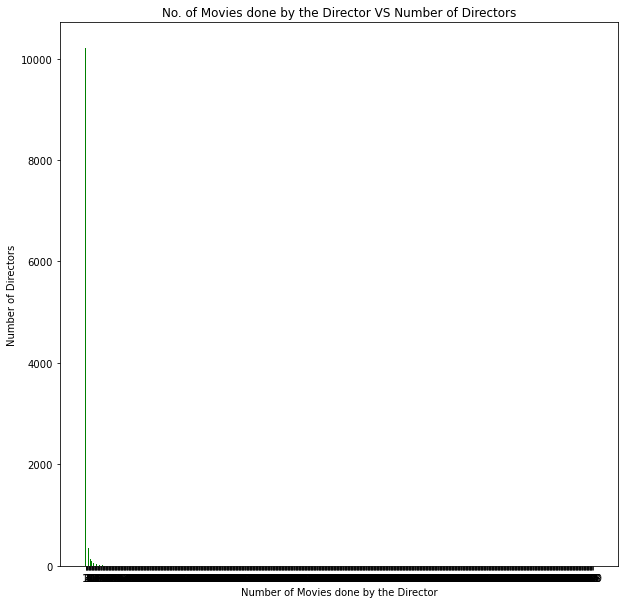

<Figure size 432x288 with 0 Axes>

In [363]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.xlabel("Number of Movies done by the Director")
plt.ylabel("Number of Directors")
plt.title("No. of Movies done by the Director VS Number of Directors")
plt.bar(label, counts, color ='green', width = 0.4)
plt.xticks(label, label)
plt.show()
plt.savefig("./plots/p2.jpg")

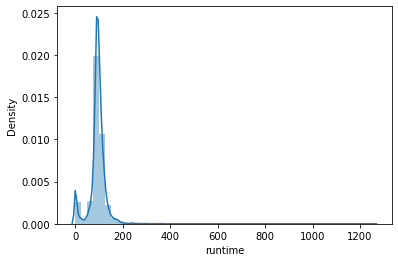

In [364]:
warnings.filterwarnings("ignore")
sb.distplot(df2['runtime'],kde=True)
plt.savefig("./plots/p3.jpg")

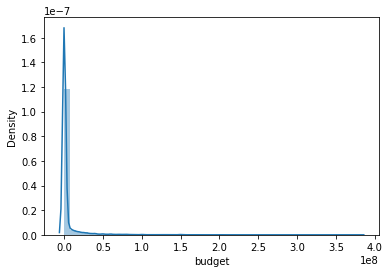

In [365]:
sb.distplot(df2['budget'],kde=True)
plt.savefig("./plots/p4.jpg")

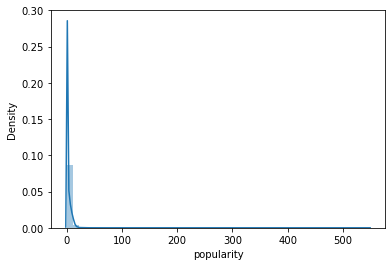

In [366]:
sb.distplot(df2['popularity'],kde=True)
plt.savefig("./plots/p5.jpg")

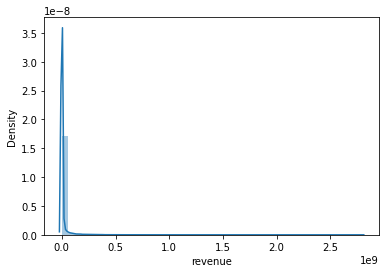

In [367]:
sb.distplot(df2['revenue'],kde=True)
plt.savefig("./plots/p6.jpg")

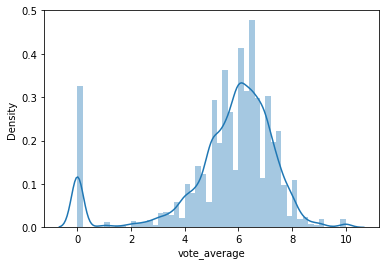

In [368]:
sb.distplot(df2['vote_average'],kde=True)
plt.savefig("./plots/p7.jpg")

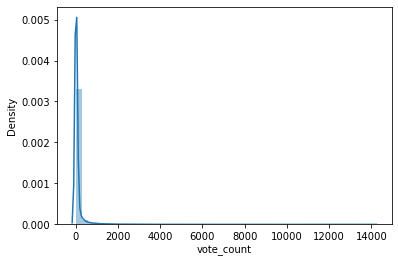

In [369]:
sb.distplot(df2['vote_count'],kde=True)
plt.savefig("./plots/p8.jpg")

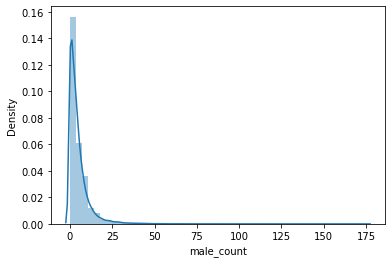

In [370]:
sb.distplot(df2['male_count'],kde=True) 
plt.savefig("./plots/p9.jpg")

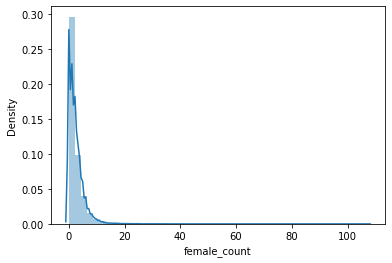

In [371]:
sb.distplot(df2['female_count'],kde=True)
plt.savefig("./plots/p10.jpg")

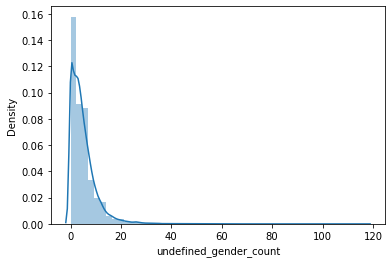

In [372]:
sb.distplot(df2['undefined_gender_count'],kde=True)
plt.savefig("./plots/p11.jpg")

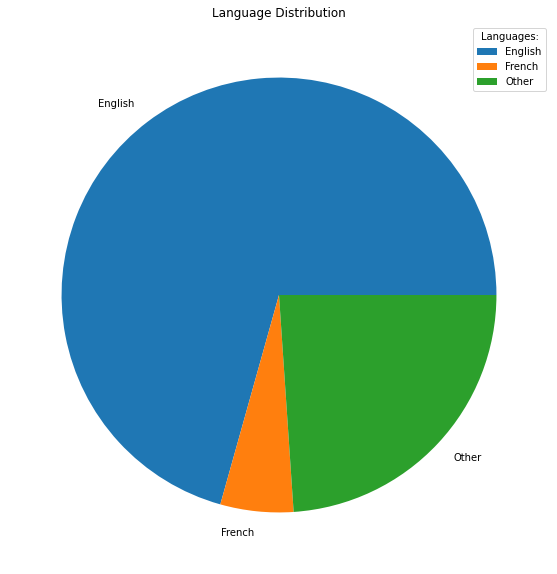

<Figure size 432x288 with 0 Axes>

In [373]:
lang = dict(df2.original_language.value_counts())
counts = []
labels = []
languages_rev = dict(zip(languages.values(), languages.keys()))
# counts.append(lang[0])
t = 0
for i in lang.keys():
    if(i == 0):
        counts.append(lang[i])
    elif(i == 1):
        counts.append(lang[i])
    else:
        t += lang[i]
counts.append(t)
labels.append("English")
labels.append("French") 
labels.append("Other") 

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.title("Language Distribution")
plt.pie(counts, labels = labels)
plt.legend(title = "Languages:")
plt.show() 
plt.savefig("./plots/p12.jpg")

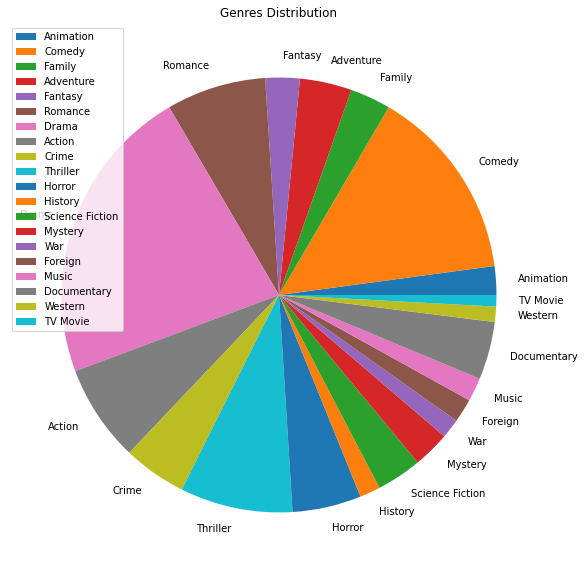

<Figure size 432x288 with 0 Axes>

In [375]:
genres_counts = [0]*len(genres)
genres_rev = dict(zip(genres.values(), genres.keys()))
for i in df2.index:
    res = df2["genres"][i]
    for j in res:
        genres_counts[j] += 1
labels = []
for i in range(len(genres_rev)):
    labels.append(genres_rev[i])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.title("Genres Distribution")
plt.pie(genres_counts, labels = labels)
plt.legend()
plt.show()
plt.savefig("./plots/p13.jpg")

### DROP Characters Varies a lot and not many insights since varies a lot in the same franchise

In [ ]:
# char_counts = [0]*len(character)
# char_rev = dict(zip(character.values(), character.keys()))
# for i in range(len(df2)):
#     res = df2.loc[i, "characters"]
#     for j in res:
#         char_counts[j] += 1
        
        
        
# labels = []
# for i in range(len(genres_rev)):
#     labels.append(genres_rev[i])
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)
# plt.title("Genres Distribution")
# plt.pie(genres_counts, labels = labels)
# plt.legend()
# plt.show() 

In [ ]:
# char_counts[994]

In [ ]:
# char_rev

# Making a custom one hot encoding function for using with the attributes with array values

In [389]:
def one_hot_encode_arr_attri(dummy_no, data, encode_dict, attri):
    #first figure out
    dataf = data.copy()
    list_counts = [0] * len(encode_dict)
    for i in dataf.index:
        try:
            res = json.loads(df2[attri][i])
        except:
            res = df2[attri][i]
        
        for j in res:
            list_counts[j] += 1
            
    encode_dict = dict(zip(encode_dict.values(), encode_dict.keys()))
    final_dict = {}
    for i in range(len(encode_dict)):
        final_dict[i] = list_counts[i]
    top_list = list(dict(sorted(final_dict.items(), key=lambda x:x[1], reverse=True)[:dummy_no]).keys())
    
    dummy_data = np.zeros(len(dataf.index)*dummy_no).reshape(dummy_no,len(dataf.index))
    c = 0
    for i in dataf.index:
        if(i == len(dataf.index)):
            break
        try:
            res = json.loads(df[attri][i])
        except:
            res = df2[attri][i]
        for j in res:
            if(j in top_list):
                ind = top_list.index(j)
                dummy_data[ind][i] = 1
    
    dataf.drop(attri, axis=1, inplace=True)
    for i in range(len(top_list)):
        dataf[encode_dict[top_list[i]].lower().replace(' ', '_')] = dummy_data[i].tolist()
    return dataf

In [390]:
data = one_hot_encode_arr_attri(19, df2, genres, 'genres')
data = one_hot_encode_arr_attri(10, data, production_countries, "production_countries")
data = one_hot_encode_arr_attri(10, data, production_companies, "production_companies")
data = one_hot_encode_arr_attri(10, data, languages, "spoken_languages")

In [391]:
data.to_csv('movies46k_prepro_onehot.csv')

### year-wise distribution 

In [400]:
date_dic = dict(data["release_year"].value_counts())

In [401]:
mad, mid = sorted(list(date_dic.keys()))[-1], sorted(list(date_dic.keys()))[0]

In [402]:
labels = []
for i in range(mid, mad+1):
    labels.append(i)

date_counts = [0] * len(labels)
for i in date_dic.keys():
    date_counts[labels.index(int(i))] = date_dic[i]

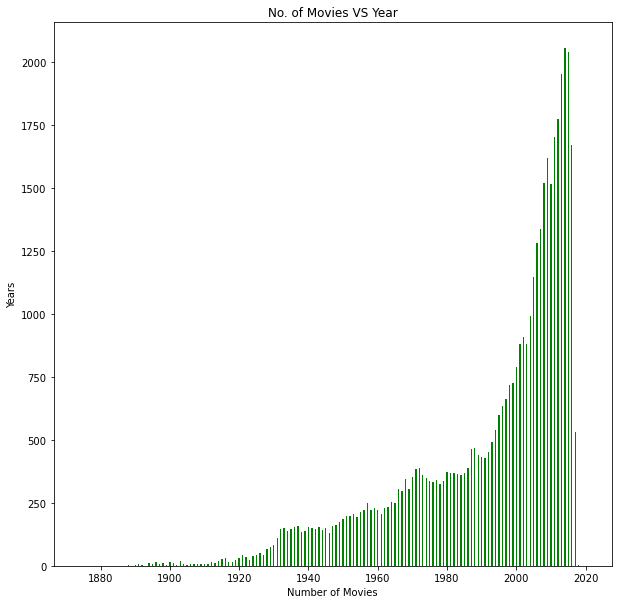

<Figure size 432x288 with 0 Axes>

In [403]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.xlabel("Number of Movies")
plt.ylabel("Years")
plt.title("No. of Movies VS Year")
plt.bar(labels, date_counts, color ='green', width = 0.4)
plt.show()
plt.savefig("./plots/p14.jpg")

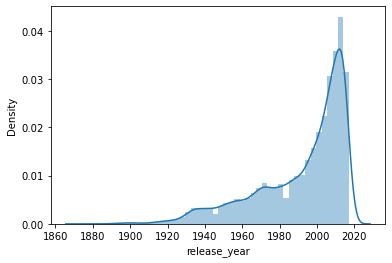

In [405]:
l = []
d = data["release_year"]
sb.distplot(d,kde=True)
plt.savefig("./plots/p15.jpg")